In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [5]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}
df = pd.DataFrame(data_spam)

In [8]:
#1(a1)
print("=" * 60)
print("PRAWDOPODOBIEŃSTWA A PRIORI")
print("=" * 60)
class_counts = df['Spam'].value_counts()
total = len(df)
priors = class_counts / total

print(f"Liczba przypadków SPAM: {class_counts['TAK']}")
print(f"Liczba przypadków NIE SPAM: {class_counts['NIE']}")
print(f"Razem: {total}")
print()
print(f"P(Spam = TAK) = {class_counts['TAK']}/{total} = {priors['TAK']:.3f}")
print(f"P(Spam = NIE) = {class_counts['NIE']}/{total} = {priors['NIE']:.3f}")
print()

PRAWDOPODOBIEŃSTWA A PRIORI
Liczba przypadków SPAM: 4
Liczba przypadków NIE SPAM: 8
Razem: 12

P(Gra = TAK) = 4/12 = 0.333
P(Gra = NIE) = 8/12 = 0.667



In [9]:
#1(a2)
print("=" * 60)
print("PRAWDOPODOBIEŃSTWA WARUNKOWE")
print("=" * 60)

features = ['Słowo_1', 'Słowo_2', 'Wykrzyknik']
conditionals = {}

for feature in features:
    print(f"\n{'='*60}")
    print(f"Cecha: {feature.upper()}")
    print(f"{'='*60}")
    conditionals[feature] = {}

    for class_val in ['TAK', 'NIE']:
        class_data = df[df['Spam'] == class_val]
        class_count = len(class_data)

        print(f"\nDla klasy {class_val} ({class_count} przypadków):")
        print("-" * 40)

        conditionals[feature][class_val] = {}
        feature_counts = class_data[feature].value_counts()

        for feature_val in df[feature].unique():
            count = feature_counts.get(feature_val, 0)
            prob = count / class_count
            conditionals[feature][class_val][feature_val] = prob

            print(f"  {feature_val:12s}: {count} przypadków → "
                  f"P({feature}={feature_val} | {class_val}) = "
                  f"{count}/{class_count} = {prob:.3f}")

PRAWDOPODOBIEŃSTWA WARUNKOWE

Cecha: SŁOWO_1

Dla klasy TAK (4 przypadków):
----------------------------------------
  darmowy     : 4 przypadków → P(Słowo_1=darmowy | TAK) = 4/4 = 1.000
  spotkanie   : 0 przypadków → P(Słowo_1=spotkanie | TAK) = 0/4 = 0.000
  raport      : 0 przypadków → P(Słowo_1=raport | TAK) = 0/4 = 0.000
  oferta      : 0 przypadków → P(Słowo_1=oferta | TAK) = 0/4 = 0.000

Dla klasy NIE (8 przypadków):
----------------------------------------
  darmowy     : 0 przypadków → P(Słowo_1=darmowy | NIE) = 0/8 = 0.000
  spotkanie   : 3 przypadków → P(Słowo_1=spotkanie | NIE) = 3/8 = 0.375
  raport      : 2 przypadków → P(Słowo_1=raport | NIE) = 2/8 = 0.250
  oferta      : 3 przypadków → P(Słowo_1=oferta | NIE) = 3/8 = 0.375

Cecha: SŁOWO_2

Dla klasy TAK (4 przypadków):
----------------------------------------
  wygrana     : 2 przypadków → P(Słowo_2=wygrana | TAK) = 2/4 = 0.500
  jutro       : 0 przypadków → P(Słowo_2=jutro | TAK) = 0/4 = 0.000
  kwartalny   : 0 przypad

In [12]:
#1(a3)
print("\n" + "=" * 60)
print("PREDYKCJA DLA NOWEGO REKORDU")
print("=" * 60)

new_record = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

print(f"\nNowy rekord:")
for key, val in new_record.items():
    print(f"  {key}: {val}")
print()

# Obliczenia dla każdej klasy
scores = {}

for class_val in ['TAK', 'NIE']:
    print(f"\n{'='*60}")
    print(f"Obliczenia dla klasy: {class_val}")
    print(f"{'='*60}")

    # Zaczynamy od prior
    score = priors[class_val]
    print(f"\n1. Prior: P({class_val}) = {score:.3f}")

    # Mnożymy przez każdą cechę
    step = 2
    for feature, value in new_record.items():
        prob = conditionals[feature][class_val].get(value, 0)
        print(f"{step}. P({feature}={value} | {class_val}) = {prob:.3f}")
        score *= prob
        print(f"   Score po mnożeniu: {score:.6f}")
        step += 1

    print(f"\nWynik końcowy dla {class_val}: {score:.6f}")
    scores[class_val] = score


PREDYKCJA DLA NOWEGO REKORDU

Nowy rekord:
  Słowo_1: darmowy
  Słowo_2: wygrana
  Wykrzyknik: TAK


Obliczenia dla klasy: TAK

1. Prior: P(TAK) = 0.333
2. P(Słowo_1=darmowy | TAK) = 1.000
   Score po mnożeniu: 0.333333
3. P(Słowo_2=wygrana | TAK) = 0.500
   Score po mnożeniu: 0.166667
4. P(Wykrzyknik=TAK | TAK) = 1.000
   Score po mnożeniu: 0.166667

Wynik końcowy dla TAK: 0.166667

Obliczenia dla klasy: NIE

1. Prior: P(NIE) = 0.667
2. P(Słowo_1=darmowy | NIE) = 0.000
   Score po mnożeniu: 0.000000
3. P(Słowo_2=wygrana | NIE) = 0.000
   Score po mnożeniu: 0.000000
4. P(Wykrzyknik=TAK | NIE) = 0.375
   Score po mnożeniu: 0.000000

Wynik końcowy dla NIE: 0.000000


In [13]:
# Normalizacja
print("\n" + "=" * 60)
print("NORMALIZACJA I WYNIK KOŃCOWY")
print("=" * 60)

total_score = sum(scores.values())
print(f"\nSuma scores: {scores['TAK']:.6f} + {scores['NIE']:.6f} = {total_score:.6f}")
print()

normalized = {k: v/total_score for k, v in scores.items()}

print("Prawdopodobieństwa po normalizacji:")
for class_val in ['TAK', 'NIE']:
    percentage = normalized[class_val] * 100
    print(f"  P({class_val} | cechy) = {scores[class_val]:.6f} / {total_score:.6f} = "
          f"{normalized[class_val]:.3f} = {percentage:.1f}%")

print("\n" + "=" * 60)
prediction = max(normalized, key=normalized.get)
print(f"PREDYKCJA: {prediction}")
print(f"Pewność: {normalized[prediction]*100:.1f}%")
print("=" * 60)


NORMALIZACJA I WYNIK KOŃCOWY

Suma scores: 0.166667 + 0.000000 = 0.166667

Prawdopodobieństwa po normalizacji:
  P(TAK | cechy) = 0.166667 / 0.166667 = 1.000 = 100.0%
  P(NIE | cechy) = 0.000000 / 0.166667 = 0.000 = 0.0%

PREDYKCJA: TAK
Pewność: 100.0%


In [15]:
#1(b)
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}
df = pd.DataFrame(data_spam)

print("=== DANE ===")
print(df, "\n")

# PRIORY (P(Spam))
priors = df["Spam"].value_counts(normalize=True)
print("Prawdopodobieństwa a priori:")
print(priors, "\n")

# Funkcja P(feature=value | Spam=class)
def cond_prob(feature, value, class_label):
    subset = df[df["Spam"] == class_label]
    return (subset[feature] == value).mean()

# Nowy email
x1 = "darmowy" #Słowo_1
x2 = "wygrana"#Słowo_2
x3 = "TAK"  #Wykrzyknik

scores = {}

for cls in priors.index:
    p_class = priors[cls]
    p_f1 = cond_prob("Słowo_1", x1, cls)
    p_f2 = cond_prob("Słowo_2", x2, cls)
    p_f3 = cond_prob("Wykrzyknik", x3, cls)

    score = p_class * p_f1 * p_f2 * p_f3
    scores[cls] = score

print("Scores (bez normalizacji):")
print(scores, "\n")

# Normalizacja
total = sum(scores.values())
posterior = {cls: scores[cls] / total for cls in scores}

print("Posterior (po normalizacji):")
for cls in posterior:
    print(f"{cls}: {posterior[cls]:.4f}")

print("\nPREDYKCJA:", max(posterior, key=posterior.get))


=== DANE ===
      Słowo_1     Słowo_2 Wykrzyknik Spam
0     darmowy     wygrana        TAK  TAK
1     darmowy     wygrana        TAK  TAK
2   spotkanie       jutro        NIE  NIE
3      raport   kwartalny        NIE  NIE
4      oferta   specjalna        TAK  NIE
5     darmowy       rabat        TAK  TAK
6   spotkanie        dziś        NIE  NIE
7      oferta  limitowana        TAK  NIE
8      raport  miesięczny        NIE  NIE
9     darmowy       rabat        TAK  TAK
10  spotkanie       pilne        NIE  NIE
11     oferta   wyjątkowa        TAK  NIE 

Prawdopodobieństwa a priori:
Spam
NIE    0.666667
TAK    0.333333
Name: proportion, dtype: float64 

Scores (bez normalizacji):
{'NIE': np.float64(0.0), 'TAK': np.float64(0.16666666666666666)} 

Posterior (po normalizacji):
NIE: 0.0000
TAK: 1.0000

PREDYKCJA: TAK


In [19]:
#1(c)
# Trening modelu
model = CategoricalNB()
model.fit(X_encoded, y_encoded)


# Predykcja dla nowego rekordu
new_record = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
    }

new_record_encoded = []
for feature in features:
    value = new_record[feature]
    encoded_value = le_dict[feature].transform([value])[0]
    new_record_encoded.append(encoded_value)

new_record_array = np.array([new_record_encoded])

# Predykcja
prediction = model.predict(new_record_array)
probabilities = model.predict_proba(new_record_array)

print("\n" + "=" * 60)
print("WERYFIKACJA ZE SKLEARN")
print("=" * 60)
print(f"Predykcja: {le_target.inverse_transform(prediction)[0]}")
print(f"Prawdopodobieństwa: TAK={probabilities[0][1]:.3f}, NIE={probabilities[0][0]:.3f}")


WERYFIKACJA ZE SKLEARN
Predykcja: TAK
Prawdopodobieństwa: TAK=0.968, NIE=0.032


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


Porównanie wyników:
Wszystkie trzy podpunkty (a, b, c) przewidują tę samą klasę – „TAK”, co potwierdza spójność modelu i prawidłową implementację algorytmu. Podpunkty (a) i (b) dają identyczne wyniki, ponieważ używają czystej postaci Naive Bayes bez jakichkolwiek modyfikacji. Wyniki sklearn (podpunkt c) różnią się wartościami prawdopodobieństw, ale nie zmieniają predykcji. Różnice wynikają z zastosowania domyślnego Laplace smoothing (α = 1), który powoduje dodanie +1 do każdego licznika i zapobiega prawdopodobieństwom równym zero. Dzięki temu sklearn zwraca wartości ciągłe (np. P(TAK)=0.968 zamiast 1.000).

# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

Liczba przypadków grypy:
Grypa
TAK    8
NIE    7
Name: count, dtype: int64 

Prawdopodobieństwa warunkowe:

--- Gorączka ---
wysoka:  P(val|TAK)=0.750   P(val|NIE)=0.143
niska:  P(val|TAK)=0.000   P(val|NIE)=0.714
umiarkowana:  P(val|TAK)=0.250   P(val|NIE)=0.143

--- Kaszel ---
TAK:  P(val|TAK)=1.000   P(val|NIE)=0.143
NIE:  P(val|TAK)=0.000   P(val|NIE)=0.857

--- Zmęczenie ---
duże:  P(val|TAK)=0.875   P(val|NIE)=0.000
małe:  P(val|TAK)=0.000   P(val|NIE)=0.857
umiarkowane:  P(val|TAK)=0.125   P(val|NIE)=0.143


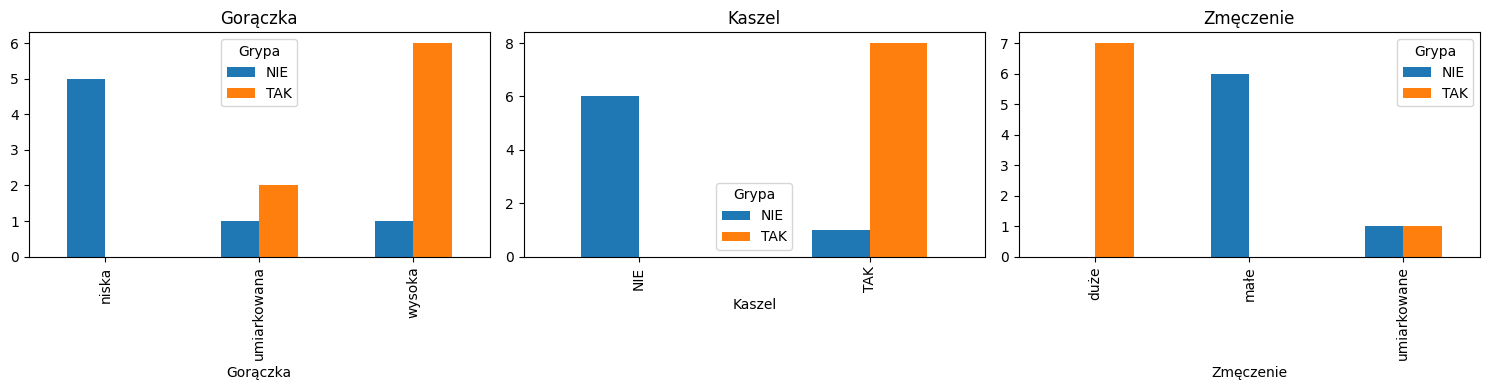

In [20]:
#2(a)
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)

# 1
print("Liczba przypadków grypy:")
print(df_grypa["Grypa"].value_counts(), "\n")

# 2
def cond_prob(df, feature, value, cls):
    subset = df[df["Grypa"] == cls]
    return (subset[feature] == value).mean()

print("Prawdopodobieństwa warunkowe:")
for col in ["Gorączka", "Kaszel", "Zmęczenie"]:
    print(f"\n--- {col} ---")
    for val in df_grypa[col].unique():
        p_tak = cond_prob(df_grypa, col, val, "TAK")
        p_nie = cond_prob(df_grypa, col, val, "NIE")
        print(f"{val}:  P(val|TAK)={p_tak:.3f}   P(val|NIE)={p_nie:.3f}")

# 3
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, ["Gorączka", "Kaszel", "Zmęczenie"]):
    df_grypa.groupby([col, "Grypa"]).size().unstack().plot(kind="bar", ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [23]:
#2(b)
df2 = df_grypa.copy()
features = ["Gorączka", "Kaszel", "Zmęczenie"]
le_dict = {}

# Enkodowanie każdej kolumny cechy
for feature in features:
    le = LabelEncoder()
    df2[feature] = le.fit_transform(df2[feature])
    le_dict[feature] = le

# Enkodowanie targetu
le_target = LabelEncoder()
df2["Grypa"] = le_target.fit_transform(df2["Grypa"])
# Trenowanie modelu
X_encoded = df2[features].values
y_encoded = df2["Grypa"].values

model = CategoricalNB()
model.fit(X_encoded, y_encoded)

# PAcjenci
patients = {
    "A": {"Gorączka": "wysoka", "Kaszel": "TAK", "Zmęczenie": "duże"},
    "B": {"Gorączka": "niska", "Kaszel": "NIE", "Zmęczenie": "małe"},
    "C": {"Gorączka": "umiarkowana", "Kaszel": "TAK", "Zmęczenie": "umiarkowane"}
}

# Predykcje
for name, record in patients.items():

    new_record_encoded = []
    for feature in features:
        value = record[feature]
        encoded_value = le_dict[feature].transform([value])[0]
        new_record_encoded.append(encoded_value)

    new_record_array = np.array([new_record_encoded])

    # Predykcja
    prediction = model.predict(new_record_array)
    probabilities = model.predict_proba(new_record_array)[0]

    print("\n" + "=" * 60)
    print(f"WERYFIKACJA ZE SKLEARN — PACJENT {name}")
    print("=" * 60)
    print(f"Predykcja: {le_target.inverse_transform(prediction)[0]}")
    print(f"Prawdopodobieństwa: TAK={probabilities[1]:.3f}, NIE={probabilities[0]:.3f}")



WERYFIKACJA ZE SKLEARN — PACJENT A
Predykcja: TAK
Prawdopodobieństwa: TAK=0.991, NIE=0.009

WERYFIKACJA ZE SKLEARN — PACJENT B
Predykcja: NIE
Prawdopodobieństwa: TAK=0.003, NIE=0.997

WERYFIKACJA ZE SKLEARN — PACJENT C
Predykcja: TAK
Prawdopodobieństwa: TAK=0.852, NIE=0.148
